# Predicting Heart Disease

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

This project can be useful for companies that focuses on providing healthcare solutions. We've gathered anonymized data from multiple hospitals on several patients. This [dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

In this project we'll use the dataset to accurately predict the likelihood of a new patient having heart disease in the future. Let's start with exploring the dataset.

## Source

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations

**Total: 1190 observations**<br>
**Duplicated: 272 observations**

**Final dataset: 918 observations**

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

## Setup

In [764]:
# import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [765]:
# reading the dataset and printing the features

heart_patients = pd.read_csv("dataset/heart.csv")
heart_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [766]:
# printing the first 5 rows for visibility

heart_patients.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In total, this dataset has **918** observations with 11 features. Each observation has a target defined _y == HeartDisease_ which indicates if the observation in context is diagnosed with CVD.

## Features

In [767]:
# numerical - age of the patient
heart_patients['Age'].value_counts().head(3)

Age
54    51
58    42
55    41
Name: count, dtype: int64

In [768]:
# categorical - sex of the patient
heart_patients['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [769]:
# categorical - type of chest pain the patient encounters
# 
# TA: Typical Angina,
# ATA: Atypical Angina,
# NAP: Non-Anginal Pain,
# ASY: Asymptomatic
heart_patients['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [770]:
# numerical - resting blood pressure [mm Hg]
heart_patients['RestingBP'].value_counts().head(3)

RestingBP
120    132
130    118
140    107
Name: count, dtype: int64

In [771]:
# numerical - serum cholesterol [mm/dl]
heart_patients['Cholesterol'].value_counts().head(3)

Cholesterol
0      172
254     11
223     10
Name: count, dtype: int64

In [772]:
# categorical - fasting blood sugar. [1: if FastingBS > 120 mg/dl, 0: otherwise]
heart_patients['FastingBS'].value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

In [773]:
# categorical - resting electrocardiogram results 
#
# Normal: Normal, 
# ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 
# LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
heart_patients['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [774]:
# numerical - maximum heart rate achieved [between 60 and 202]
heart_patients['MaxHR'].value_counts().head(3)

MaxHR
150    43
140    41
120    36
Name: count, dtype: int64

In [775]:
# categorical - exercise-induced angina [Y: Yes, N: No]
heart_patients['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [776]:
# numerical - trce in ST segment below baseline [value measured in depression]
heart_patients['Oldpeak'].value_counts().head(3)

Oldpeak
0.0    368
1.0     86
2.0     76
Name: count, dtype: int64

In [777]:
# categorical - the slope of the peak exercise ST segment 
#
# Up: upsloping
# Flat: flat, 
# Down: downsloping
heart_patients['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [778]:
# summarised
heart_patients.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# EDA: Descriptive Statistics

Exploratory Data Analysis using Descriptive Statistics on numeric features

In [779]:
heart_patients.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Age

Out of 918 patients we can observe that the average age is 54 years and the minimum age is 28 whereas the maximum age is 77.

In [780]:
heart_patients['Age'].value_counts(normalize=True).head(10)

Age
54    0.055556
58    0.045752
55    0.044662
56    0.041394
57    0.041394
52    0.039216
51    0.038126
59    0.038126
62    0.038126
53    0.035948
Name: proportion, dtype: float64

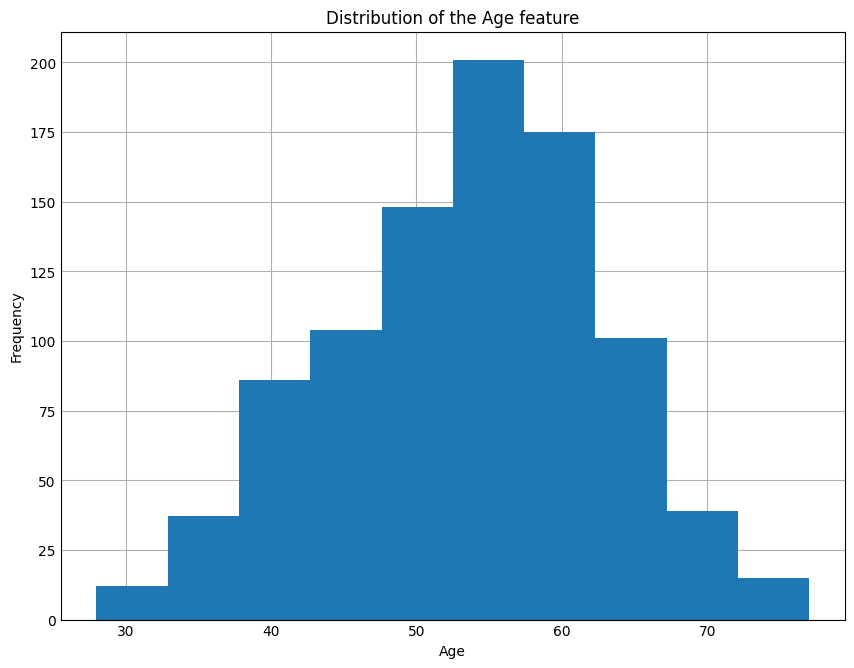

In [781]:
plt.style.use('_mpl-gallery')

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Distribution of the Age feature")
ax.hist(heart_patients['Age'])
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
plt.show()

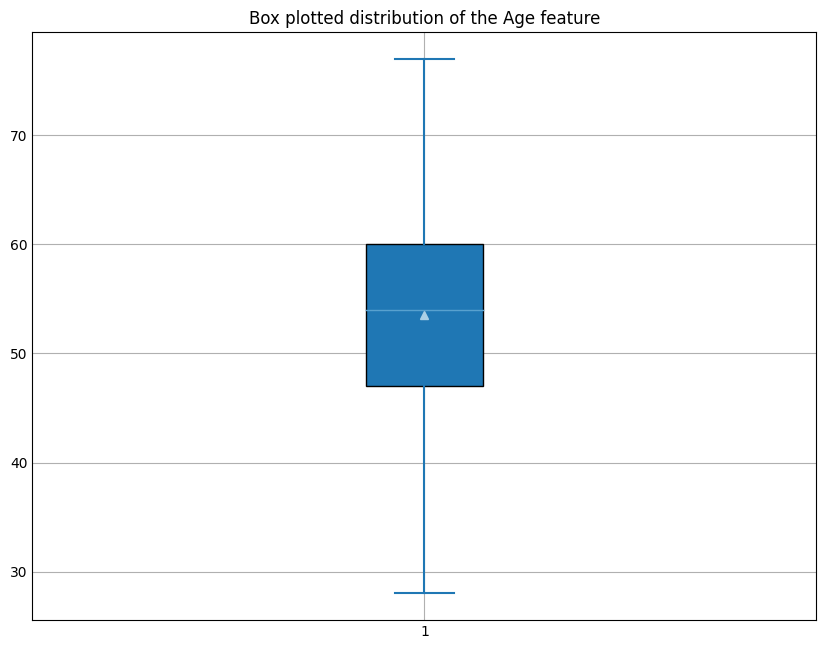

In [782]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Box plotted distribution of the Age feature")
ax.boxplot(heart_patients['Age'], 
           patch_artist=True,
           showmeans=True, 
           showfliers=True,
           whiskerprops={"color": "C0", "linewidth": 1.5},
           capprops={"color": "C0", "linewidth": 1.5})
plt.show()

In [783]:
print(f"Occupation of top 10 most common ages in our dataset: {heart_patients['Age'].value_counts(normalize=True).head(10).sum() * 100}%")

Occupation of top 10 most common ages in our dataset: 41.830065359477125%


Looking at both graphs and the normalized descriptive print of the age feature we conclude that most of the patients are between 48 and 60 years old. However they don't dominate the dataset since the top 10 Ages only account for 41.8% of the total observations.

Also note the healthy first, second and third quantiles (resp. 47, 54, 60) distribution combared to the min (28) and max (77)

## RestingBP

The RestingBP feature describes blood pressure while the patient is resting. This is unlikely to be 0 and needs to be investigated further.

In [784]:
print(f"Minimum RestingBP: {heart_patients['RestingBP'].describe()['min']} mm Hg")

Minimum RestingBP: 0.0 mm Hg


## Cholesterol

We're also observing 0 for the min and a very high max within the Cholesterol feature. Let's also investigate if this value makes sense.

In [785]:
print(f"Minimum Cholesterol: {heart_patients['Cholesterol'].describe()['min']} mm dl")

Minimum Cholesterol: 0.0 mm dl


As per the dataset description, Cholesterol contains the serum cholesterol values. And per the [American Heart Association](https://www.heart.org/en/health-topics/cholesterol/about-cholesterol/what-your-cholesterol-levels-mean), serum cholesterol:

> is a composite of different measurements. Your total blood cholesterol is calculated by adding your HDL and LDL cholesterol levels, plus 20% of your triglyceride level.

This information is enough to let us know that a 0 value for serum cholesterol is unlikely.

### Skewed distribution

The median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution. Also visible in the graph.

In [786]:
print(f"Cholesterol median: {heart_patients['Cholesterol'].median()} mm dl")

Cholesterol median: 223.0 mm dl


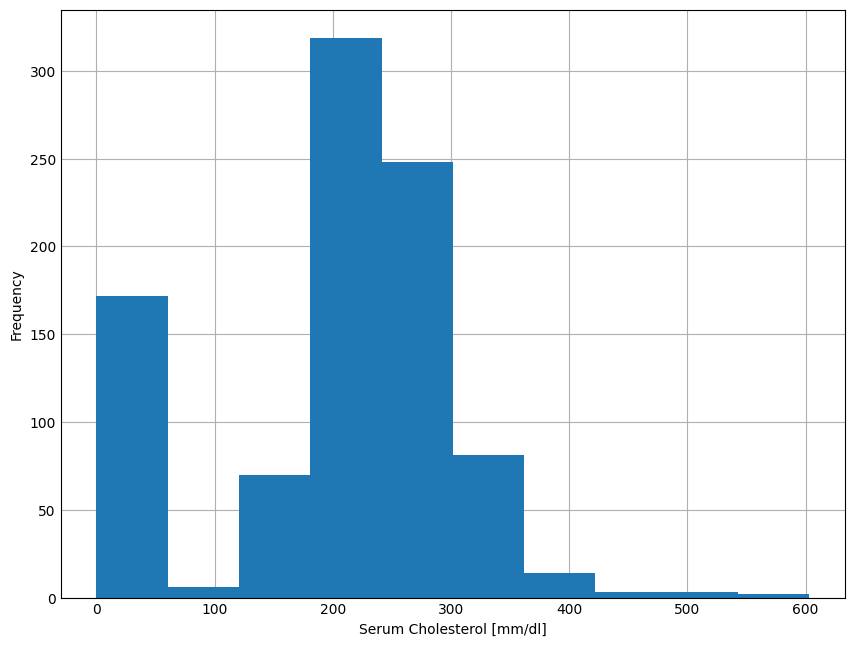

In [787]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(heart_patients['Cholesterol'])
ax.set_xlabel("Serum Cholesterol [mm/dl]")
ax.set_ylabel("Frequency")
plt.show()

According to [medlineplus.gov](https://medlineplus.gov/cholesterollevelswhatyouneedtoknow.html) a heathy level of cholesterol should be between 125 - 200 mg/dL for both men and women above 20. We can concolude that some of our patients fall in that healthy range but most of our patients have too much cholesterol in their cells.

Given the fact that the patients in our dataset are from people hospitalised with chest pain it would not be strange to observe a higher level of cholesterol in their bodies. However, without further investigation we might assume that cholesterol levels above 400 mg/dL are outliers.

## Oldpeak

Similar to cholesterol, we observe high max values for the oldpeak feature. The Oldpeak column represents the ST depression measured in depression units. The maximum value of 6.2 suggests a significant ST depression in some patients during exercise.

We need to investigate further to verify if this makes sense.

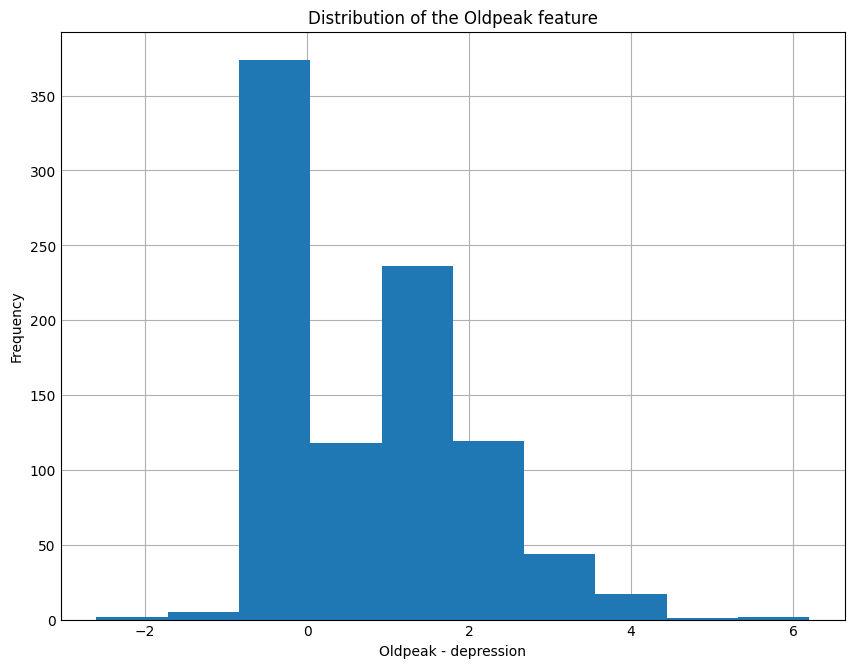

In [788]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Distribution of the Oldpeak feature")
ax.hist(heart_patients['Oldpeak'])
ax.set_xlabel("Oldpeak - depression")
ax.set_ylabel("Frequency")
plt.show()

## Missing values
A quick count of any null values shows us that we're not missing any values in the numerical features of this dataset.

In [789]:
heart_patients.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [790]:
print(f"Total amount of null values in dataset: {heart_patients.isna().sum().sum()}")

Total amount of null values in dataset: 0


# EDA: Visualizations

Exploratory Data Analysis using visualisations for categorical features

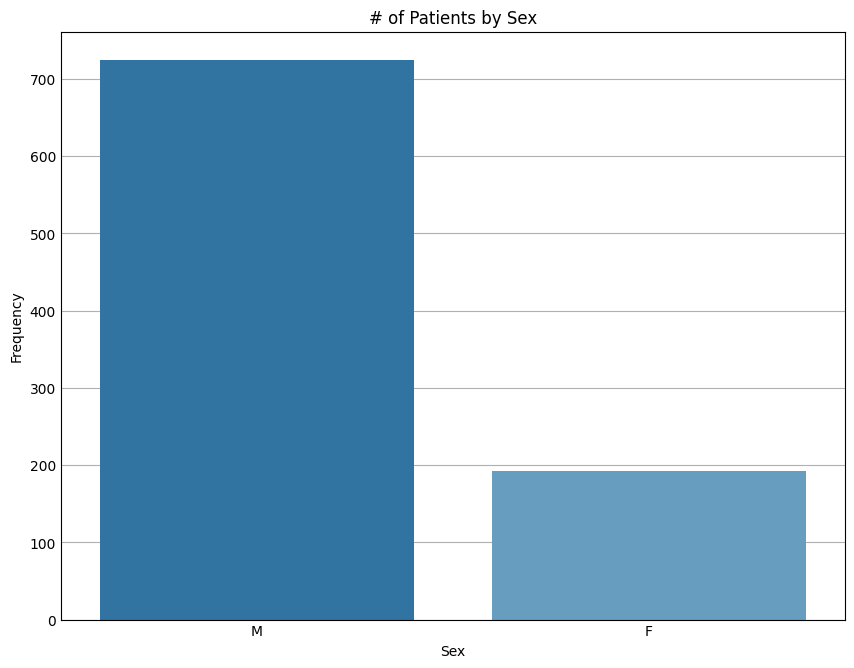

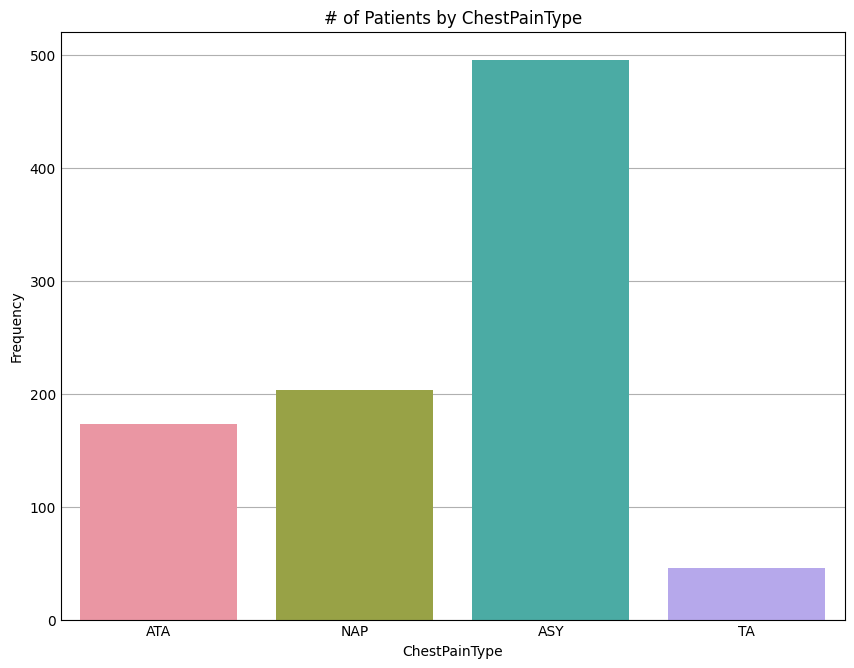

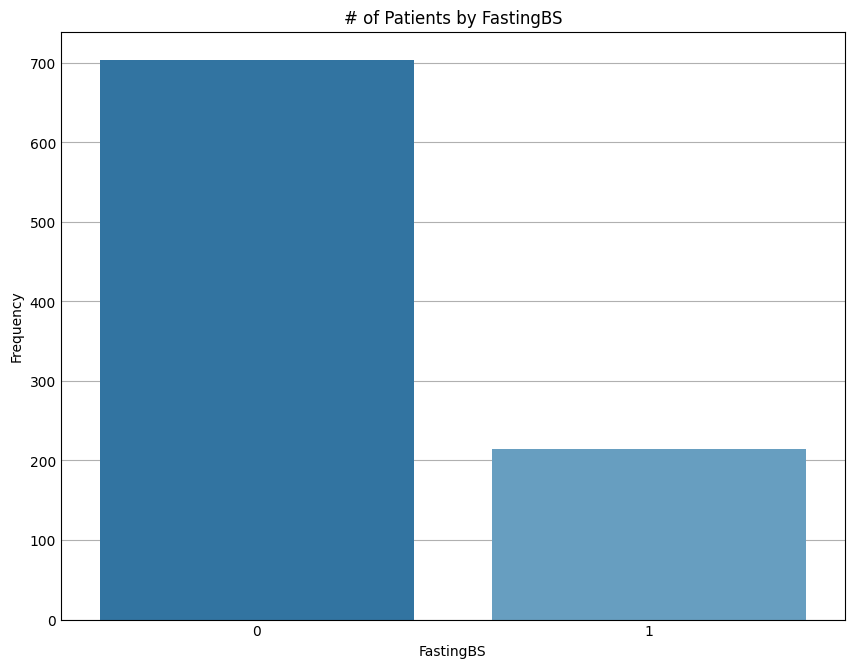

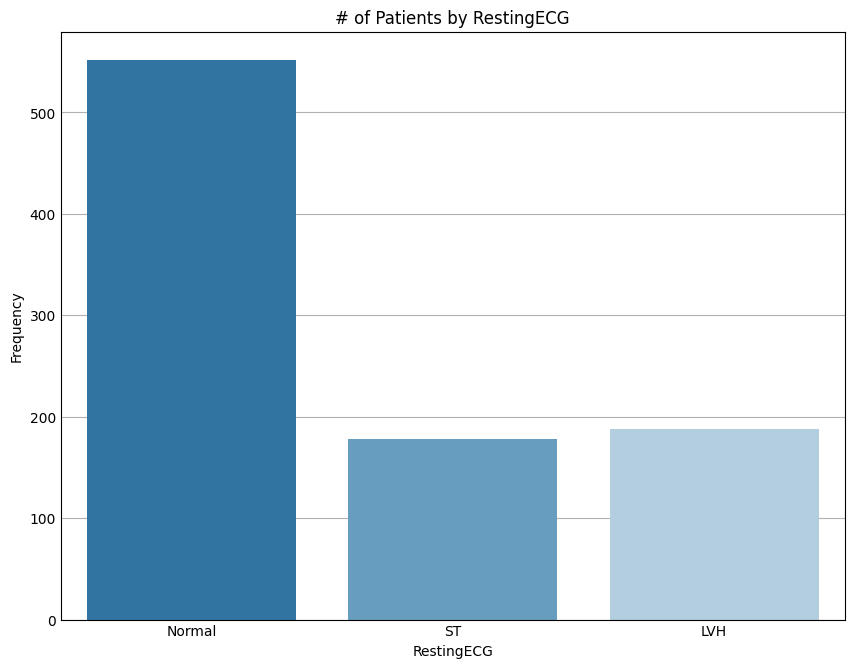

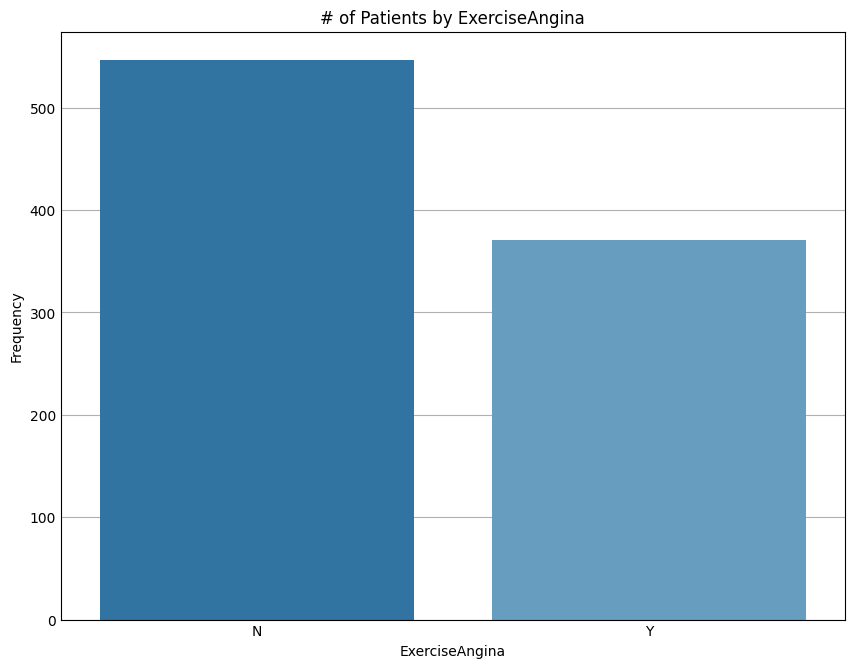

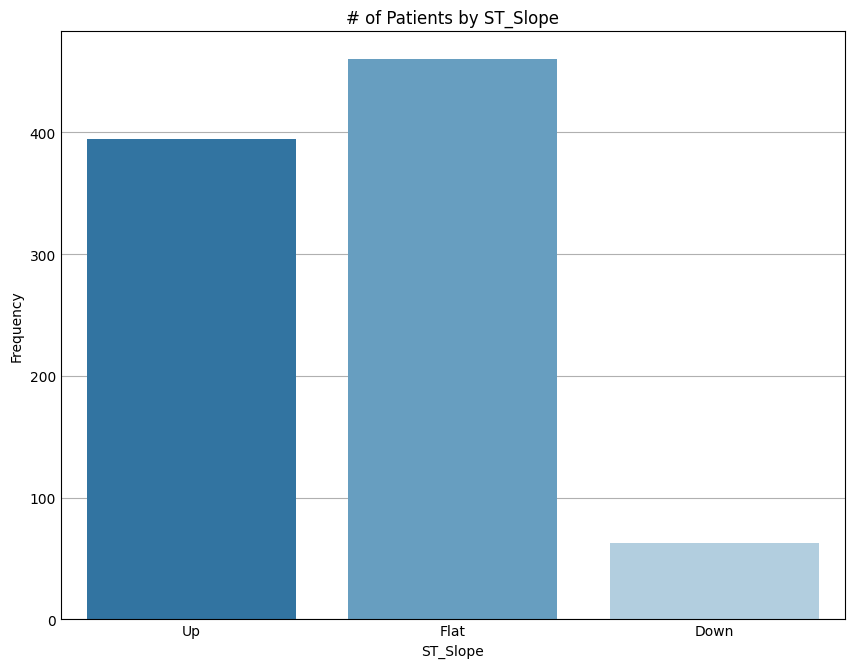

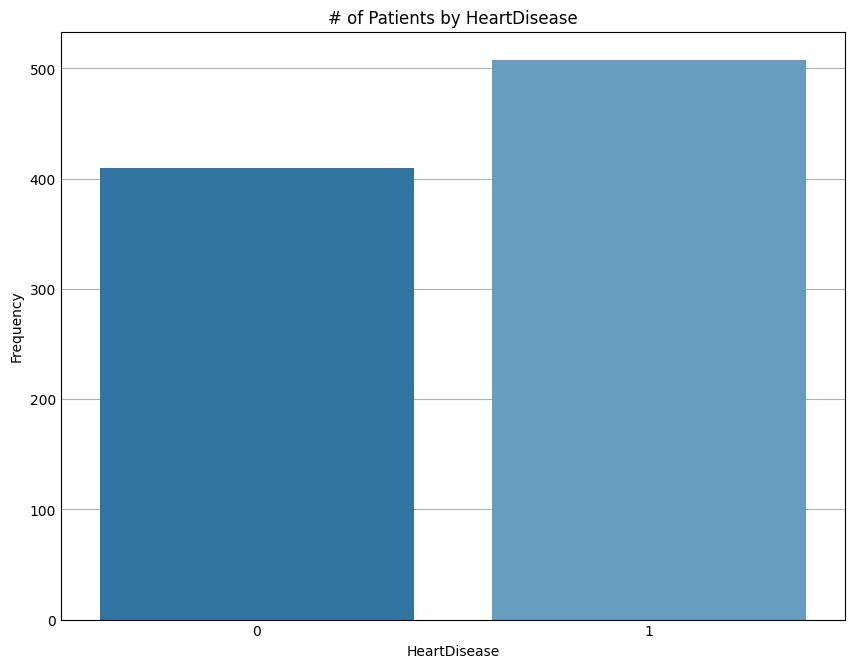

Frequencies for Categorical Features
---
Sex
M    725
F    193
Name: count, dtype: int64
---
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
---
FastingBS
0    704
1    214
Name: count, dtype: int64
---
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
---
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
---
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
---
HeartDisease
1    508
0    410
Name: count, dtype: int64
---


In [791]:
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

# Plot count of patients for each categorical column
for column in categorical_columns:
    # Create a new figure
    plt.figure(figsize=(8, 6))
    
    # Create a countplot of the column
    sns.countplot(data=heart_patients, x=column)
    
    # Set the x-axis label
    plt.xlabel(column)
    
    # Set the y-axis label
    plt.ylabel('Frequency')
    
    # Set the plot title
    plt.title(f'# of Patients by {column}')
    
    # Display the plot
    plt.show()
    
print("Frequencies for Categorical Features")
print("---")
# Display the value counts for each categorical column
for column in categorical_columns:
    # Print the value counts of the column
    print(heart_patients[column].value_counts())
    print("---")

### Sex

Here we observe that only 21% of our patients are female. We might need to rethink if we want to focus exclusively on males or investigate if we have enough data to include females in this research without introducing bias.

### ChestPainType

A significant number of patients, 392, diagnosed with heart disease and CVD have asymptomatic (ASY) chest pain. While chest pain could be a relevant feature for our model, it should be noted that asymptomatic implies that those patients who had heart disease did not have chest pain as a symptom.

## Visualisations for patients diagnosed with CVD

Let's quickly revisit the same graphs but now focussing only on patients that were diagnosed with a heart disease `(HeartDisease == 1)`

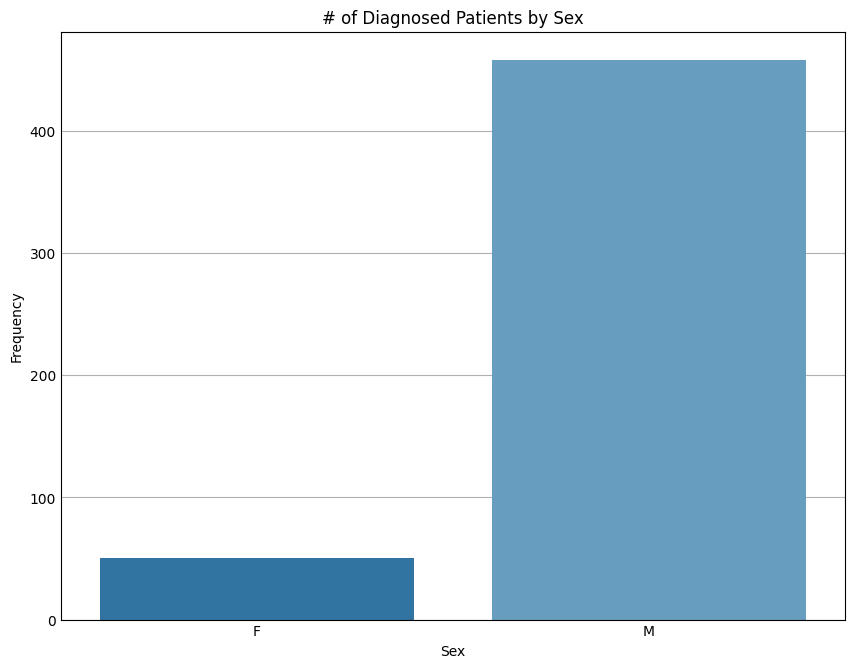

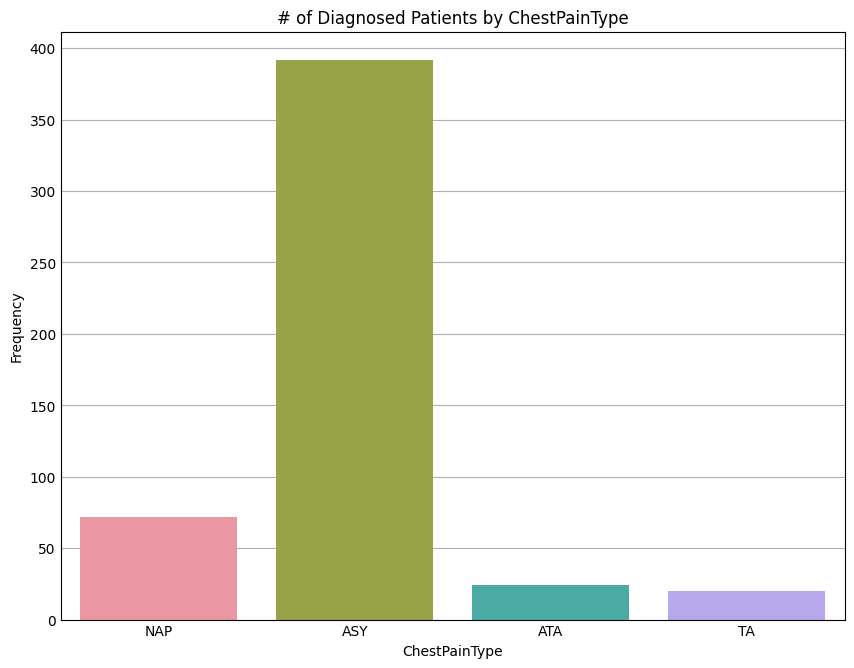

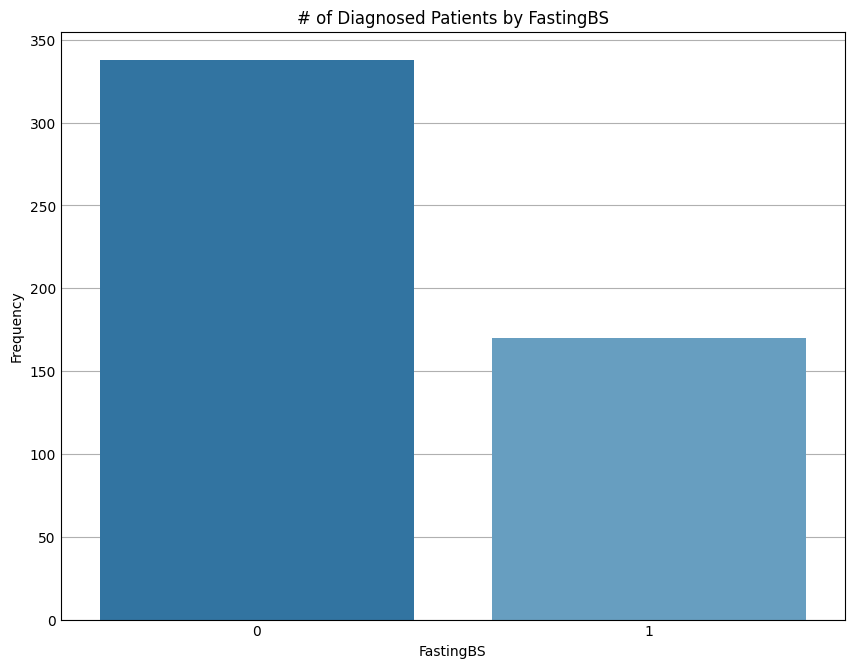

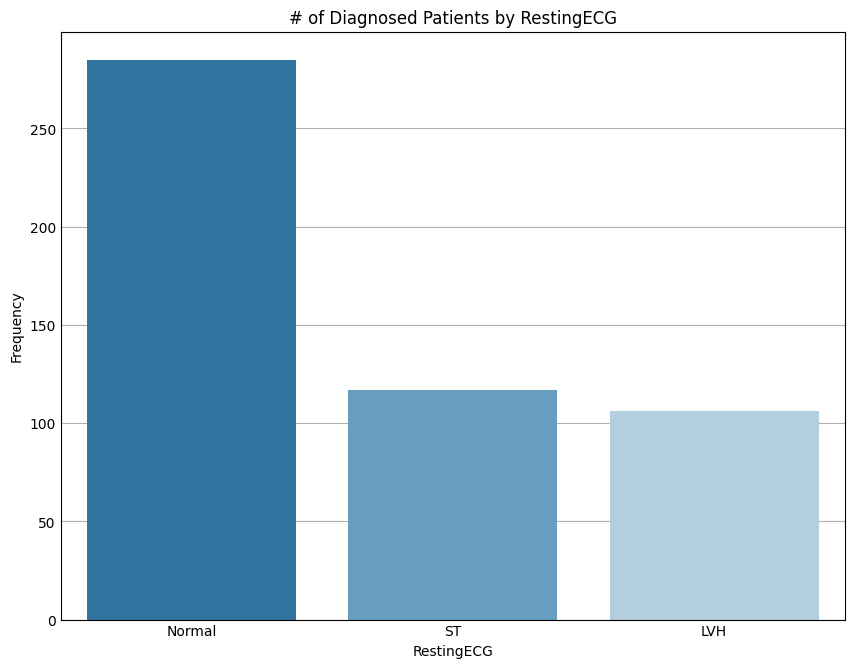

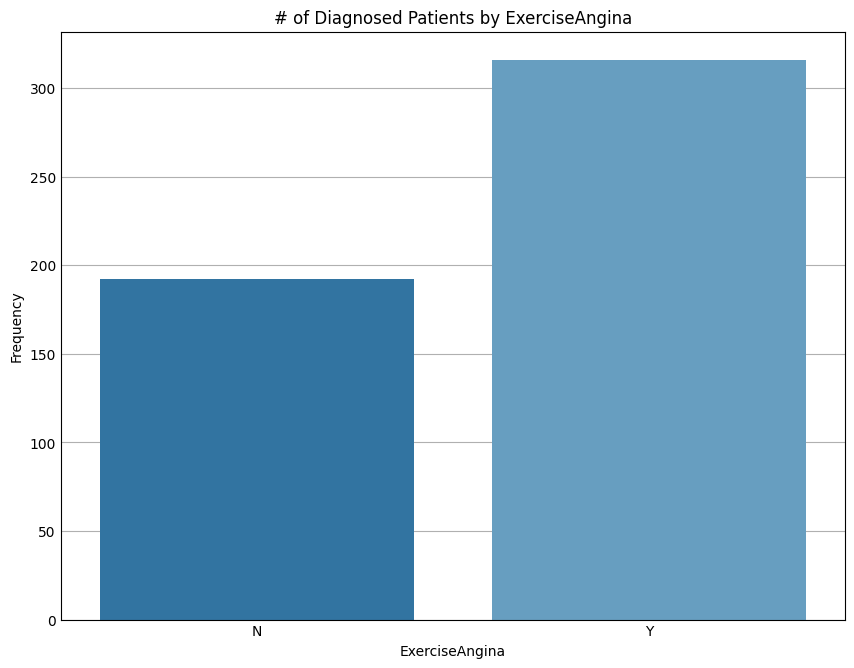

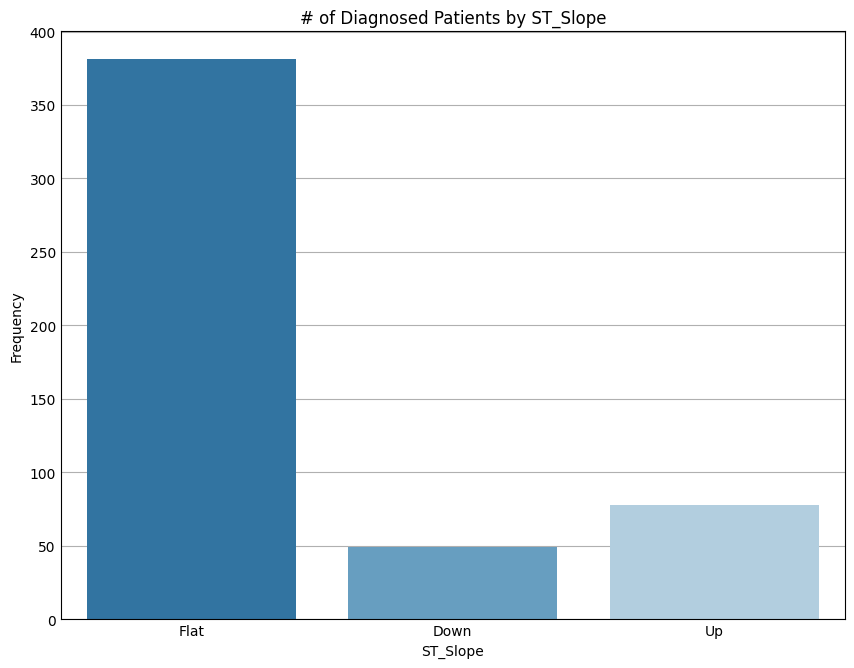

In [792]:
heart_disease_patients = heart_patients[heart_patients['HeartDisease'] == 1]

# now do the same while only looking at patients diagnosed with CVD
for column in categorical_columns:
    # skip the target column since we already filtered down to only patients diagnosed with CVD
    if column == 'HeartDisease': break

    plt.figure(figsize=(8, 6))
    sns.countplot(data=heart_disease_patients, x=column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'# of Diagnosed Patients by {column}')
    plt.show()

### Conclusions on FastingBS, RestingECG and ST_Slope

Now that we visualised these graph, focussing on diagnosed patients, we can clearly observe a high number (170) of patients with blood sugar greater than 120 mg/dl in relation to those who were not diagnosed with CVD.

Next to that, both RestingECG and ST_Slope show increased values for resp. 'Normal' and 'Flat'

# Data Cleaning

Earlier we identified there were no missing values to clean up but we did find a couple of columns with 0 value for RestingBP and Cholesterol that don't make sense. We'll start by identifying how often these values occur and how big of a problem it is.

In [793]:
print(f"# of rows with 0 value for RestingBP: {heart_patients[heart_patients['RestingBP'] == 0].shape[0]}")

# of rows with 0 value for RestingBP: 1


In [794]:
print(f"Number of rows with 0 value for Cholesterol: {heart_patients[heart_patients['Cholesterol'] == 0].shape[0]}")

Number of rows with 0 value for Cholesterol: 172


Since the occurance of 0 values in RestingBP is low we will simply remove that row from the dataset. This will have a very minor impact on our model.

In [795]:
# Remove the the row with an incorrect RestingBP since it only occurs once
heart_patients = heart_patients.drop(heart_patients[heart_patients['RestingBP'] == 0].index)
heart_patients.shape

# Note that we're now working with 917 observations instead of 918

(917, 12)

Cholesterol however has 172 rows with 0 values in our dataset and make up 19% of our observations. We could impute those values with the mean grouped by HeartDisease.

Instead, let's look at the mean of the values grouped by age, sex and resting ECG of the patient. The resting blood pressure of a female in her 30s with a normal ECG might be lower than what we would get from the median of the entire column. This option might give us slightly more accurate results.

In [796]:
# shortlisted the first 5 rows before mutation
# note: there are no 0 values in Cholesterol in the first 5 rows
# use for verifcation later
heart_patients.loc[:, 'Age' : 'Cholesterol'].head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol
0,40,M,ATA,140,289
1,49,F,NAP,160,180
2,37,M,ATA,130,283
3,48,F,ASY,138,214
4,54,M,NAP,150,195


In [797]:
# shortlisted the first 5 rows, with 0 values for Cholesterol, before mutation
# use for verifcation later
heart_patients[heart_patients['Cholesterol'] == 0].loc[:, 'Age' : 'Cholesterol'].head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol
293,65,M,ASY,115,0
294,32,M,TA,95,0
295,61,M,ASY,105,0
296,50,M,ASY,145,0
297,57,M,ASY,110,0


In [798]:
def replace_0(group):
    mask = group == 0
    group.loc[mask] = group[~mask].mean()
    return group

# replace 0 values by their grouped mean
grouped_median = heart_patients.groupby(['HeartDisease', 'Age', 'Sex', 'RestingECG'])['Cholesterol']
heart_patients['Cholesterol'] = grouped_median.transform(replace_0)
heart_patients[heart_patients['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [801]:
# shortlisted the first 5 rows after mutation
# use for verifcation and confirm Cholesterol values did not change
heart_patients.loc[:, 'Age' : 'Cholesterol'].head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol
0,40,M,ATA,140,289.0
1,49,F,NAP,160,180.0
2,37,M,ATA,130,283.0
3,48,F,ASY,138,214.0
4,54,M,NAP,150,195.0


In [809]:
# shortlisted the first 5 rows, with 0 values for Cholesterol, after mutation
# use for verifcation and confirm Cholesterol values were replaced with the mean for that group
heart_patients.iloc[293:298].loc[:, 'Age' : 'Cholesterol']

,Age,Sex,ChestPainType,RestingBP,Cholesterol
293,65,M,ASY,115,263.000000
294,32,M,TA,95,529.000000
295,61,M,ASY,105,259.833333
296,50,M,ASY,145,237.000000
297,57,M,ASY,110,270.333333


We've succesfully replaced the 0 values for Cholesterol with the mean value grouped by HeartDisease, Age, Sex and RestingECG.